# Predicting Presence of Heart Disease using Machine Learning
# Data Preprocessing

## Preparing CSV File

In [1]:
import csv
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
dataset = open('data.csv','w',newline='')
writer = csv.writer(dataset)
writer.writerow(columns)
dataset.close()

## Adding Data to CSV File 

In [2]:
file = open('raw-data\processed.cleveland.data')
dataset = open('data.csv','a',newline='')
writer = csv.writer(dataset)

for line in file:
    data = line.strip().split(',')
    writer.writerow(data)
    
file.close()
dataset.close()

## Data Preparation

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df = df.replace('?',np.nan)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null object
thal        301 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [5]:
# Drop Records with Missing Fields
df = df.dropna()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Exploration & Processing

Average Age: 54.54208754208754


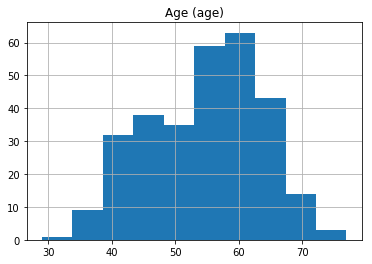

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

df['age'].hist()
print("Average Age:", df['age'].mean())
plt.title('Age (age)')
plt.show()

1.0    201
0.0     96
Name: sex, dtype: int64


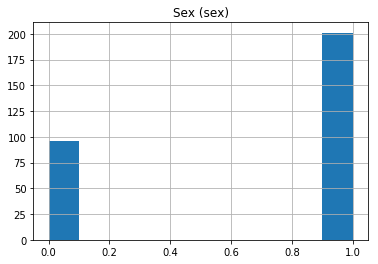

In [7]:
df['sex'].hist()
print(df['sex'].value_counts())
plt.title('Sex (sex)')
plt.show()

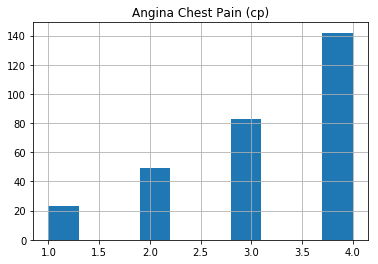

In [8]:
df['cp'].hist()
plt.title('Angina Chest Pain (cp)')
plt.show()

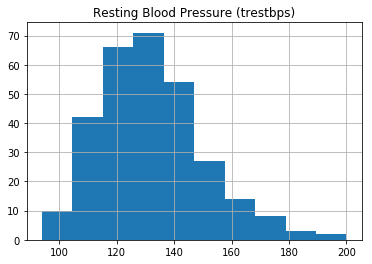

In [9]:
df['trestbps'].hist()
plt.title('Resting Blood Pressure (trestbps)')
plt.show()

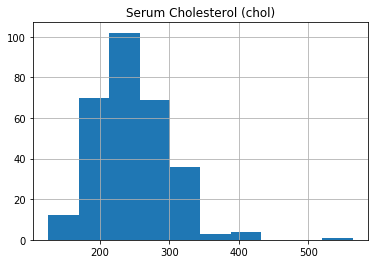

In [10]:
df['chol'].hist()
plt.title('Serum Cholesterol (chol)')
plt.show()

0.0    254
1.0     43
Name: fbs, dtype: int64


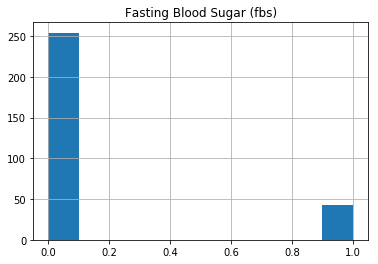

In [11]:
df['fbs'].hist()
print(df['fbs'].value_counts())
plt.title('Fasting Blood Sugar (fbs)')
plt.show()

0.0    147
2.0    146
1.0      4
Name: restecg, dtype: int64


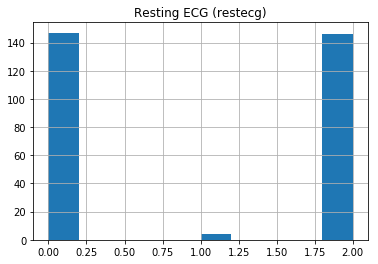

In [12]:
df['restecg'].hist()
print(df['restecg'].value_counts())
plt.title('Resting ECG (restecg)')
plt.show()

Average maximum heart rate achieved: 149.5993265993266


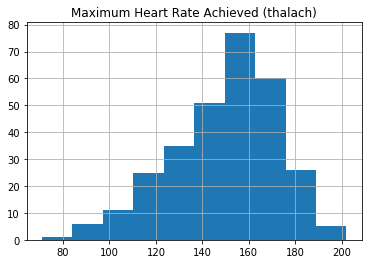

In [13]:
df['thalach'].hist()
print("Average maximum heart rate achieved:", df['thalach'].mean())
plt.title('Maximum Heart Rate Achieved (thalach)')
plt.show()

0.0    200
1.0     97
Name: exang, dtype: int64


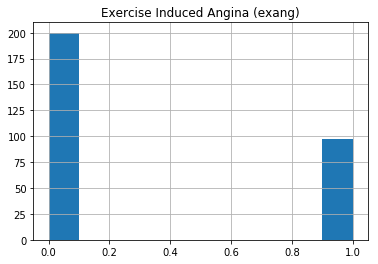

In [14]:
df['exang'].hist()
print(df['exang'].value_counts())
plt.title('Exercise Induced Angina (exang)')
plt.show()

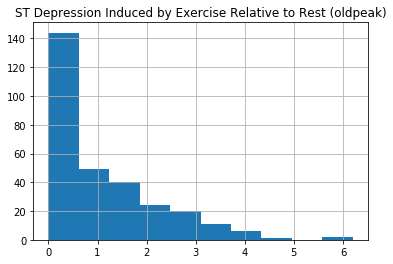

In [15]:
df['oldpeak'].hist()
plt.title('ST Depression Induced by Exercise Relative to Rest (oldpeak)')
plt.show()

1.0    139
2.0    137
3.0     21
Name: slope, dtype: int64


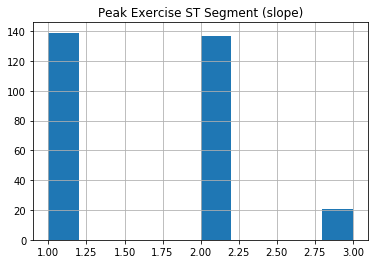

In [16]:
df['slope'].hist()
print(df['slope'].value_counts())
plt.title('Peak Exercise ST Segment (slope)')
plt.show()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


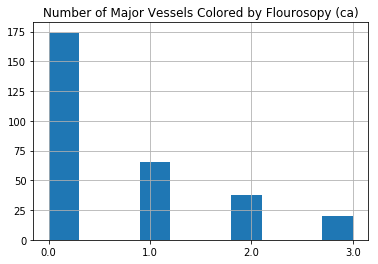

In [17]:
df['ca'].hist()
print(df['ca'].value_counts())
plt.title('Number of Major Vessels Colored by Flourosopy (ca)')
plt.show()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


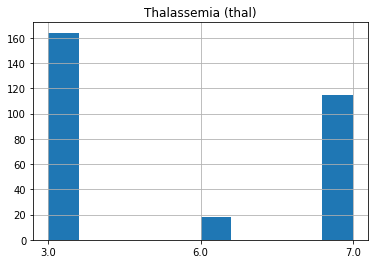

In [18]:
df['thal'].hist()
print(df['thal'].value_counts())
plt.title('Thalassemia (thal)')
plt.show()

0    160
1    137
Name: target, dtype: int64


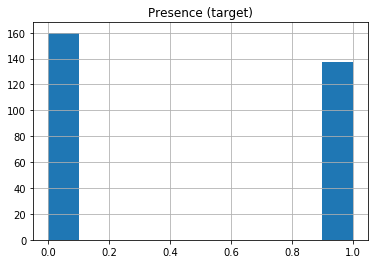

In [19]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['target'].hist()
print(df['target'].value_counts())
plt.title('Presence (target)')
plt.show()

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [21]:
df.to_csv('processed-data.csv', index=False)

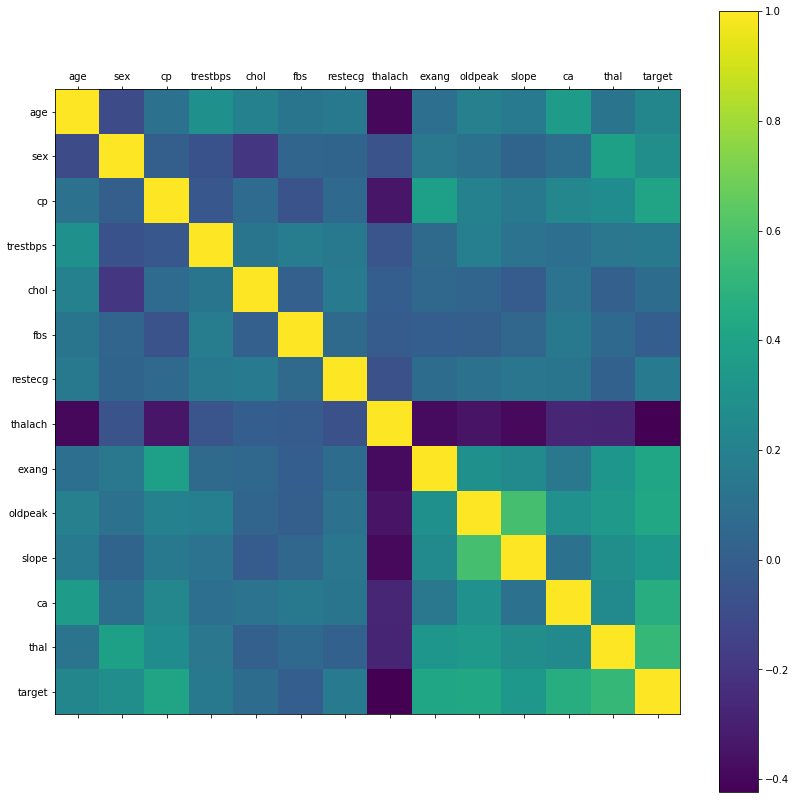

In [22]:
import pandas as pd
df = pd.read_csv('processed-data.csv')

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 10, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()